<a href="https://colab.research.google.com/github/nihalB05/project-store-sales_prediction/blob/main/project_store_sales_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __*PROJECT STORE SALES PREDICTION AND ANALYSIS*__


### Introduction
This project focuses on predicting store sales using various machine learning techniques and conducting data analysis.

### Data Exploration and Analysis
The initial steps involve importing necessary libraries, loading the dataset, and performing exploratory data analysis. This includes checking the data types, identifying missing values, visualizing distributions of numerical features, and exploring correlations between variables. Descriptive statistics and data profiling reports provide valuable insights into the dataset.

### Preprocessing
Data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features are essential for preparing the data for modeling. Pipelines are used to streamline these preprocessing tasks efficiently.

### Model Building
Several regression models are trained and evaluated to predict store sales. Models include Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, Decision Tree Regressor, and Support Vector Regressor. GridSearchCV is utilized to tune hyperparameters for each model to improve performance.

### Model Evaluation
Model performance is evaluated using metrics such as R-squared score, Mean Squared Error (MSE), and visualizing residuals. Cross-validation scores provide insights into model generalization. The best-performing model is selected based on testing R-squared score.

### Results
The results are presented in a tabular format, displaying the performance metrics of each model. The best model and its corresponding parameters are identified.

### Conclusion
The project successfully demonstrates the application of machine learning techniques in predicting store sales and provides valuable insights for stakeholders in the retail industry.


In [ ]:
import os
#get the current working directory
os.getcwd()


'c:\\Users\\Nihal Singh\\OneDrive\\Desktop\\internship projects\\New folder'

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#reading the csv file using pandas
df=pd.read_csv("C:\\Users\\Nihal Singh\\OneDrive\\Desktop\\store_train.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
#using y data profiling library to get a extensive data analysis and report of data frame
import ydata_profiling as pf
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe(include="all")

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
count             8523  7060.000000             8523      8523.000000   
unique            1559          NaN                5              NaN   
top              FDW13          NaN          Low Fat              NaN   
freq                10          NaN             5089              NaN   
mean               NaN    12.857645              NaN         0.066132   
std                NaN     4.643456              NaN         0.051598   
min                NaN     4.555000              NaN         0.000000   
25%                NaN     8.773750              NaN         0.026989   
50%                NaN    12.600000              NaN         0.053931   
75%                NaN    16.850000              NaN         0.094585   
max                NaN    21.350000              NaN         0.328391   

                    Item_Type     Item_MRP Outlet_Identifier  \
count                    8523  8523.000000              8523   
unique                     16          NaN                10   
top     Fruits and Vegetables          NaN            OUT027   
freq                     1232          NaN               935   
mean                      NaN   140.992782               NaN   
std                       NaN    62.275067               NaN   
min                       NaN    31.290000               NaN   
25%                       NaN    93.826500               NaN   
50%                       NaN   143.012800               NaN   
75%                       NaN   185.643700               NaN   
max                       NaN   266.888400               NaN   

        Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
count                 8523.000000        6113                 8523   
unique                        NaN           3                    3   
top                           NaN      Medium               Tier 3   
freq                          NaN        2793                 3350   
mean                  1997.831867         NaN                  NaN   
std                      8.371760         NaN                  NaN   
min                   1985.000000         NaN                  NaN   
25%                   1987.000000         NaN                  NaN   
50%                   1999.000000         NaN                  NaN   
75%                   2004.000000         NaN                  NaN   
max                   2009.000000         NaN                  NaN   

              Outlet_Type  Item_Outlet_Sales  
count                8523        8523.000000  
unique                  4                NaN  
top     Supermarket Type1                NaN  
freq                 5577                NaN  
mean                  NaN        2181.288914  
std                   NaN        1706.499616  
min                   NaN          33.290000  
25%                   NaN         834.247400  
50%                   NaN        1794.331000  
75%                   NaN        3101.296400  
max                   NaN       13086.964800

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df.select_dtypes(["int","float"]).corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

C:\Users\Nihal Singh\AppData\Local\Temp\ipykernel_22424\1998283115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


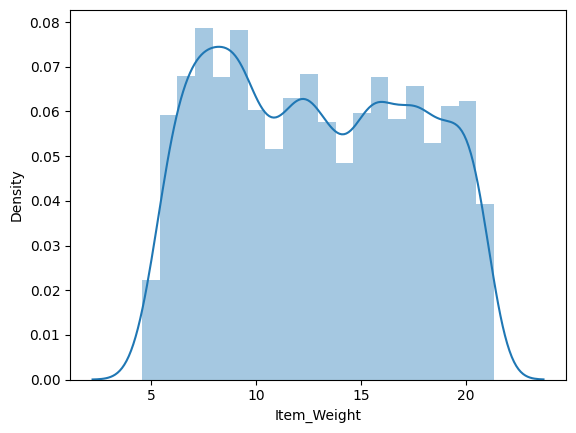

In [ ]:
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\Nihal Singh\AppData\Local\Temp\ipykernel_22424\1030214324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


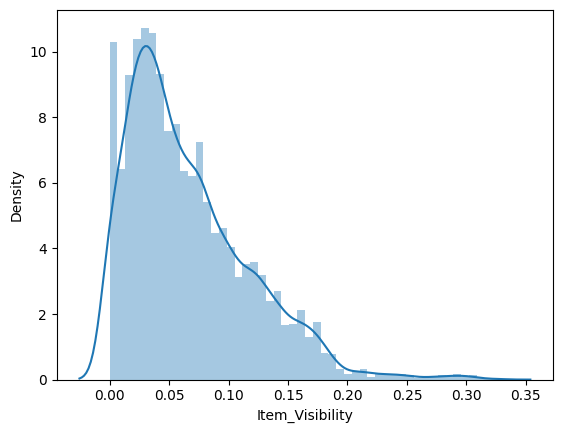

In [ ]:
sns.distplot(df['Item_Visibility'])
plt.show()


C:\Users\Nihal Singh\AppData\Local\Temp\ipykernel_22424\234432290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


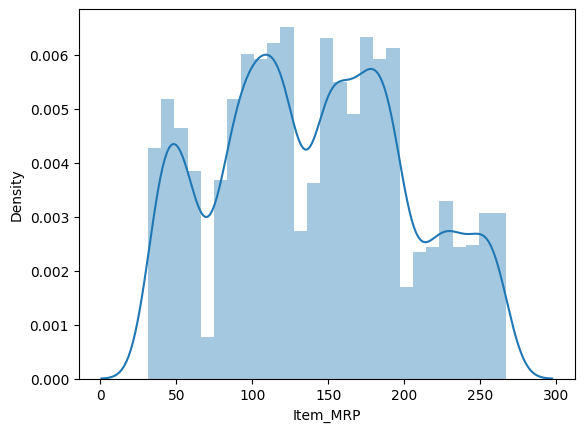

In [ ]:

sns.distplot(df['Item_MRP'])
plt.show()


C:\Users\Nihal Singh\AppData\Local\Temp\ipykernel_22424\929306131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


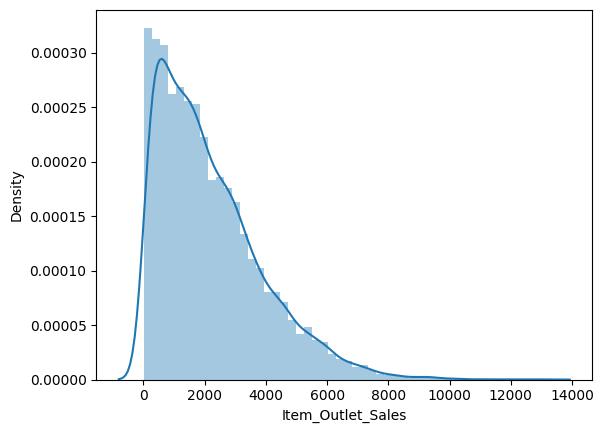

In [ ]:

sns.distplot(df['Item_Outlet_Sales'])
plt.show()

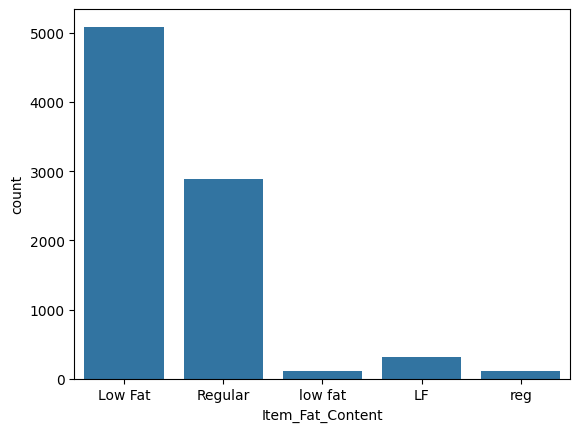

In [ ]:
sns.countplot(x=df['Item_Fat_Content'])
plt.show()

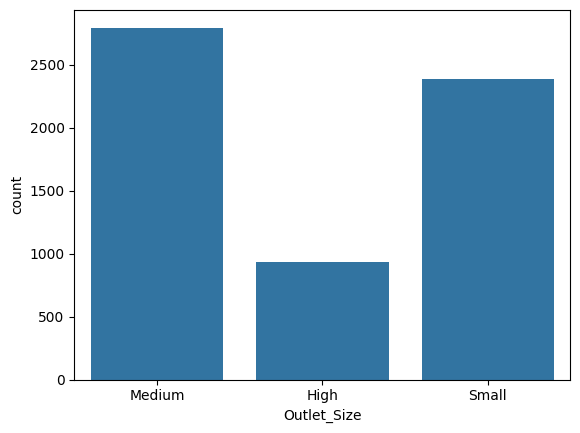

In [ ]:
sns.countplot(x=df["Outlet_Size"])
plt.show()

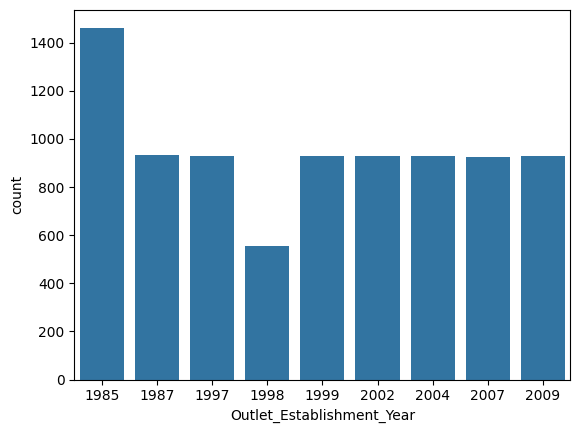

In [ ]:
sns.countplot(x=df["Outlet_Establishment_Year"])
plt.show()

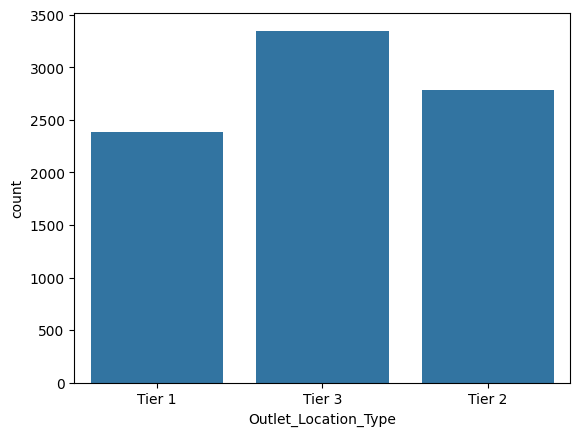

In [ ]:
sns.countplot(x=df["Outlet_Location_Type"])
plt.show()

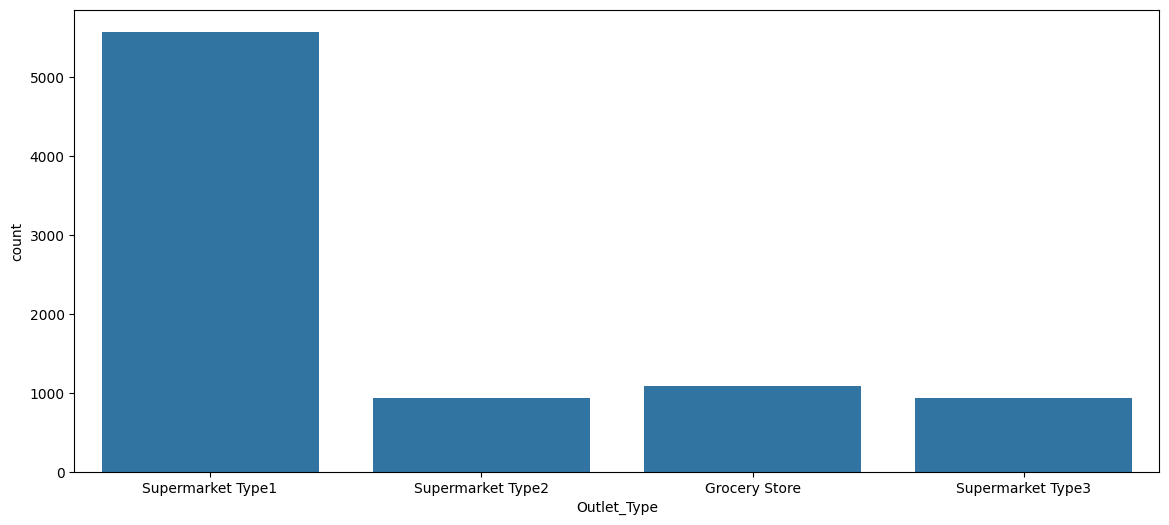

In [ ]:
plt.figure(figsize=(14,6))
fig=sns.countplot(x=df["Outlet_Type"])
plt.show()

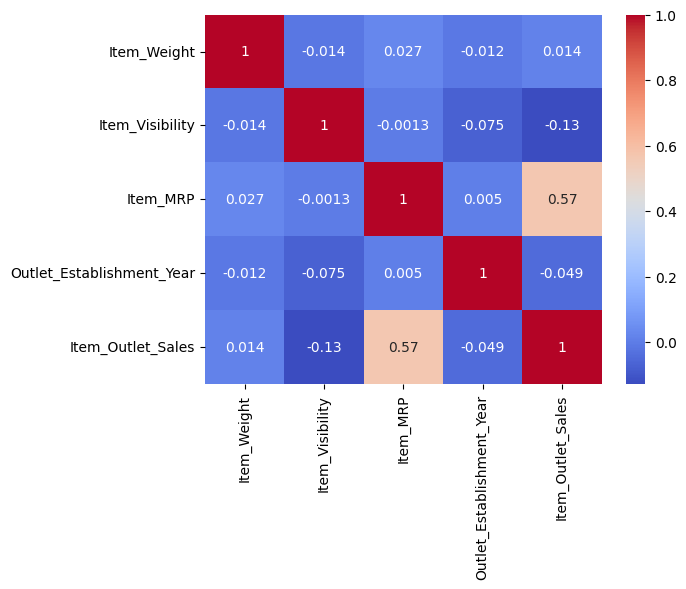

In [ ]:
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

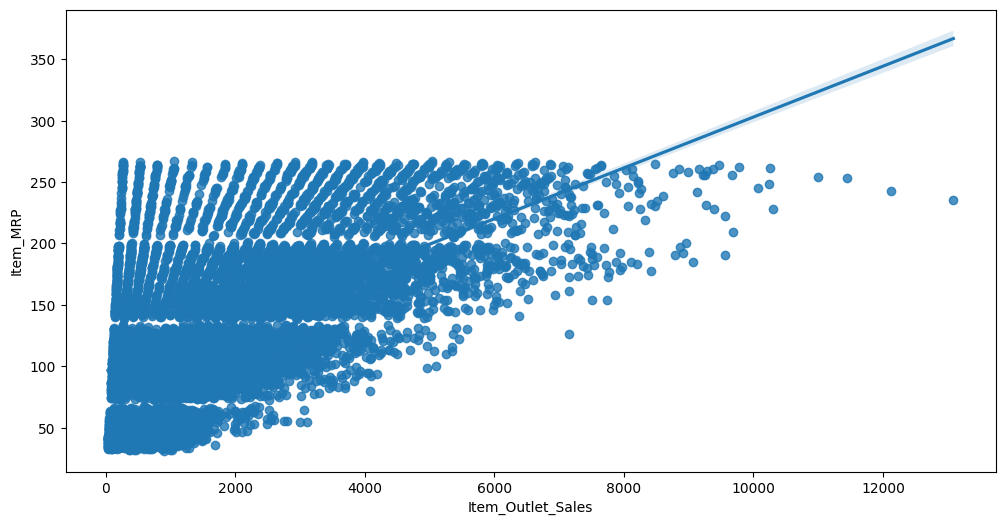

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(df,x="Item_Outlet_Sales",y="Item_MRP")
plt.show()

In [ ]:
df["age_of_store"]=2024-df["Outlet_Establishment_Year"]

In [ ]:
cat_col=df.select_dtypes(["object"]).columns.tolist()


In [ ]:
num_col=df.select_dtypes(["int","float"]).columns.tolist()

In [ ]:
num_col=[col for col in num_col if col not in ['Item_Outlet_Sales', 'Outlet_Establishment_Year']]

In [ ]:
cat_col=[col for col in cat_col if col not in ['Item_Identifier', 'Outlet_Identifier']]


In [ ]:
num_col

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age_of_store']

In [ ]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Numerical transformer
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:

# Categorical transformer
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor=ColumnTransformer(transformers=[("num",num_transformer,num_col),("cat",cat_transformer,cat_col)])

In [ ]:
x=df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [ ]:
y=df["Item_Outlet_Sales"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)

In [ ]:
x_train.shape

(5966, 9)

In [ ]:
x_test.shape

(2557, 9)

In [ ]:
y_train.shape

(5966,)

In [ ]:
y_test.shape

(2557,)

Training R2 Score: 0.5633417954535288
Testing R2 Score: 0.5627108535047621
Training Mean Squared Error: 1287830.838462434
Testing Mean Squared Error: 1234471.1662283388


C:\Users\Nihal Singh\AppData\Local\Temp\ipykernel_22424\3170525168.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_test, kde=True)


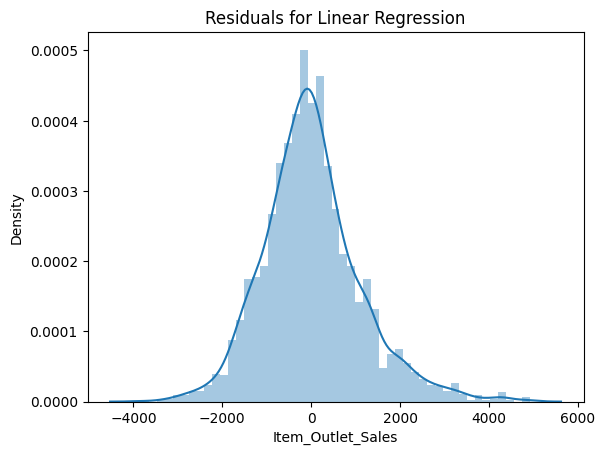

In [ ]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])


lr_pipeline.fit(x_train, y_train)

y_pred_train = lr_pipeline.predict(x_train)
y_pred_test = lr_pipeline.predict(x_test)


print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")


sns.distplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Linear Regression")
plt.show()

Training R2 Score: 1.0
Testing R2 Score: 0.18895168787073735
Training Mean Squared Error: 0.0
Testing Mean Squared Error: 2289596.6290639234


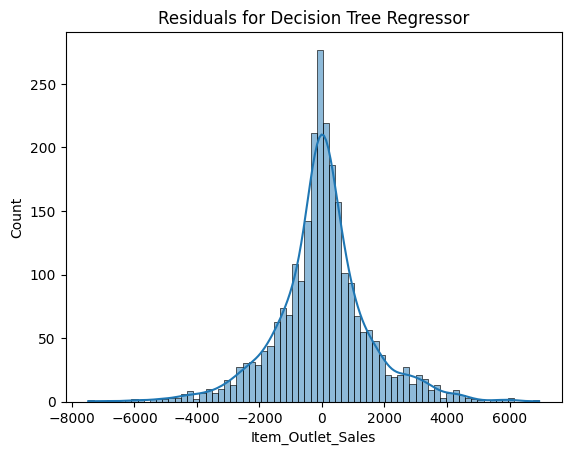

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor())
])

dt_pipeline.fit(x_train, y_train)

y_pred_train = dt_pipeline.predict(x_train)
y_pred_test = dt_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Decision Tree Regressor")
plt.show()

Training R2 Score: 0.9359999315699561
Testing R2 Score: 0.5598620494368503
Training Mean Squared Error: 188754.6390512053
Testing Mean Squared Error: 1242513.365556306


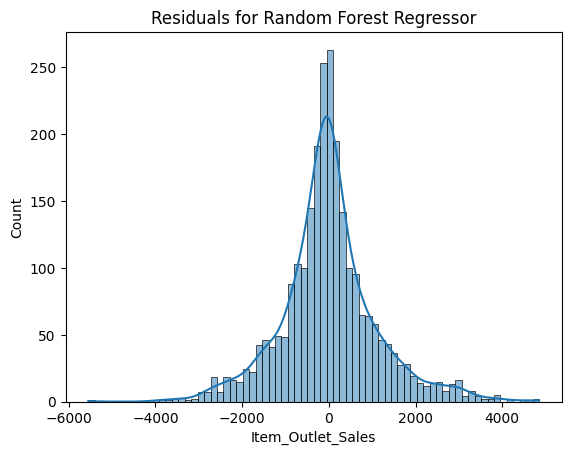

In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(x_train, y_train)

y_pred_train = rf_pipeline.predict(x_train)
y_pred_test = rf_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Random Forest Regressor")
plt.show()

Training R2 Score: 0.6367963241255523
Testing R2 Score: 0.6035419428865699
Training Mean Squared Error: 1071192.2725002838
Testing Mean Squared Error: 1119204.6362183543


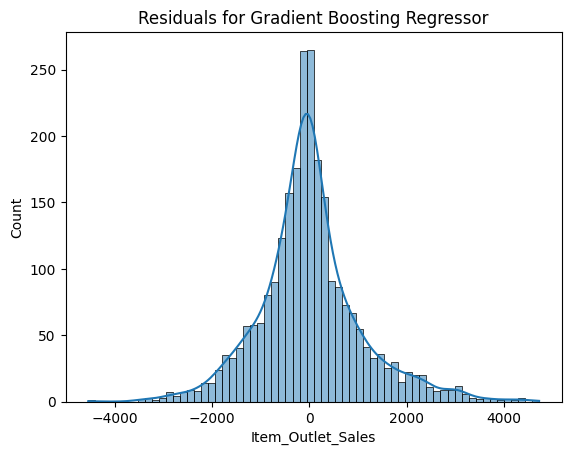

In [ ]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=69))
])

gb_pipeline.fit(x_train, y_train)

y_pred_train = gb_pipeline.predict(x_train)
y_pred_test = gb_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Gradient Boosting Regressor")
plt.show()

In [ ]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', Ridge())
])

ridge_pipeline.fit(x_train, y_train)

y_pred_train = ridge_pipeline.predict(x_train)
y_pred_test = ridge_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Ridge Regression")
plt.show()

Training R2 Score: 0.5625446662533979
Testing R2 Score: 0.5625889374651158
Training Mean Squared Error: 1290181.8021119859
Testing Mean Squared Error: 1234815.3362971602


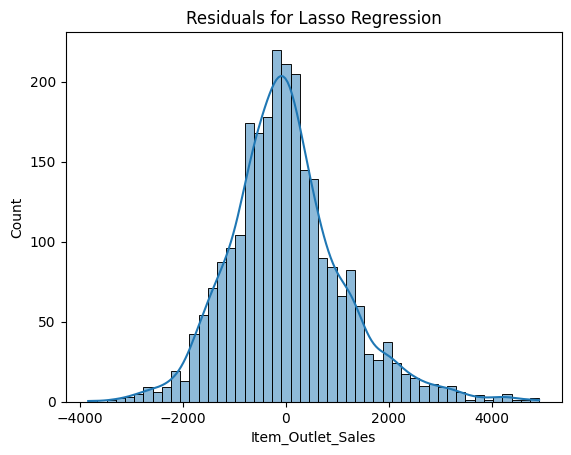

In [ ]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', Lasso())
])

lasso_pipeline.fit(x_train, y_train)

y_pred_train = lasso_pipeline.predict(x_train)
y_pred_test = lasso_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for Lasso Regression")
plt.show()

Training R2 Score: 0.9999999952954511
Testing R2 Score: 0.4941131242439607
Training Mean Squared Error: 0.01387506975570768
Testing Mean Squared Error: 1428123.1686160078


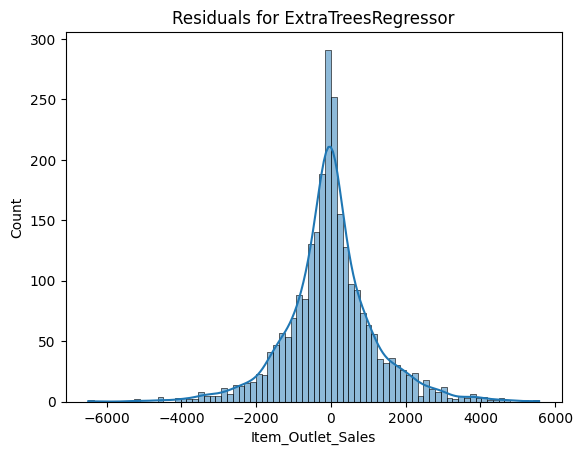

In [ ]:
extra_trees_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesRegressor())
])

extra_trees_pipeline.fit(x_train, y_train)

y_pred_train = extra_trees_pipeline.predict(x_train)
y_pred_test = extra_trees_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for ExtraTreesRegressor")
plt.show()

Training R2 Score: 0.8793447368720261
Testing R2 Score: 0.5204358212660899
Training Mean Squared Error: 355847.1295424099
Testing Mean Squared Error: 1353813.9598199076


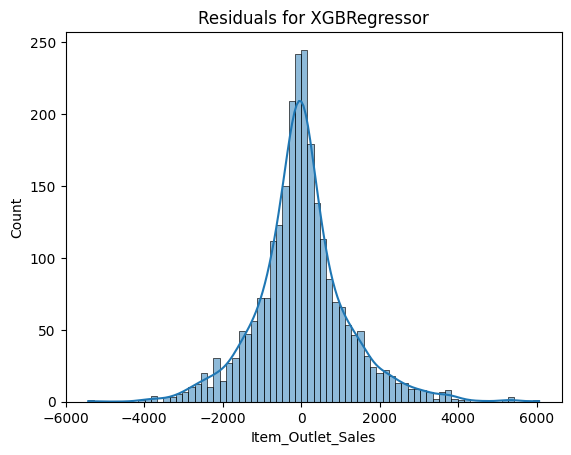

In [ ]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
])

xgb_pipeline.fit(x_train, y_train)

y_pred_train = xgb_pipeline.predict(x_train)
y_pred_test = xgb_pipeline.predict(x_test)

print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

sns.histplot(y_test - y_pred_test, kde=True)
plt.title("Residuals for XGBRegressor")
plt.show()

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR()
}

In [ ]:
param_grids = {
    "Linear Regression": {

    },
    "Ridge Regression": {
        'classifier__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    "Lasso Regression": {
        'classifier__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Support Vector Regressor": {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf']
    }
}

In [ ]:
def evaluate_model(model_name, model, param_grid):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(best_model, x, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Cross-Validation Scores: {-cv_scores}")
    print(f"Mean CV Score: {-cv_scores.mean()}")
    print(f"Standard Deviation of CV Score: {cv_scores.std()}")

    y_pred_train = best_model.predict(x_train)
    y_pred_test = best_model.predict(x_test)

    print(f"Training R2 Score: {r2_score(y_train, y_pred_train)}")
    print(f"Testing R2 Score: {r2_score(y_test, y_pred_test)}")
    print(f"Training Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
    print(f"Testing Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

    sns.histplot(y_test - y_pred_test)
    plt.title(f"Residuals for {model_name}")
    plt.show()

    return {
        'model_name': model_name,
        'best_params': grid_search.best_params_,
        'cv_scores_mean': -cv_scores.mean(),
        'cv_scores_std': cv_scores.std(),
        'training_r2': r2_score(y_train, y_pred_train),
        'testing_r2': r2_score(y_test, y_pred_test),
        'training_mse': mean_squared_error(y_train, y_pred_train),
        'testing_mse': mean_squared_error(y_test, y_pred_test)
    }


Model: Linear Regression
Best Parameters: {}
Cross-Validation Scores: [1330393.52750217 1261383.42523684 1239930.10836772 1278627.40422669
 1308195.83650052]
Mean CV Score: 1283706.060366788
Standard Deviation of CV Score: 32310.66537029782
Training R2 Score: 0.5633417954535288
Testing R2 Score: 0.5627108535047621
Training Mean Squared Error: 1287830.838462434
Testing Mean Squared Error: 1234471.1662283388


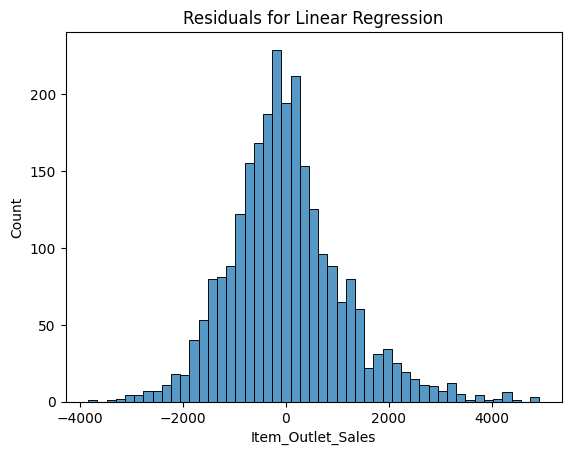

Model: Ridge Regression
Best Parameters: {'classifier__alpha': 1.0}
Cross-Validation Scores: [1330420.76701825 1261570.47883021 1239775.41590173 1278679.97321368
 1308097.74504194]
Mean CV Score: 1283708.8760011625
Standard Deviation of CV Score: 32318.307828019686
Training R2 Score: 0.5633238177471187
Testing R2 Score: 0.5626970955817535
Training Mean Squared Error: 1287883.8598976864
Testing Mean Squared Error: 1234510.0049678718


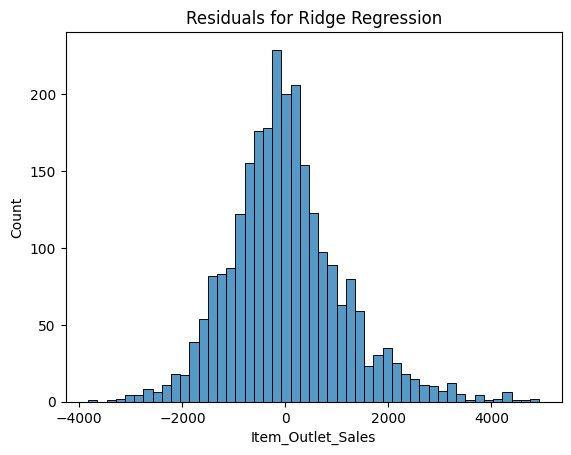

Model: Lasso Regression
Best Parameters: {'classifier__alpha': 10.0}
Cross-Validation Scores: [1332246.63657847 1255709.93927782 1238654.28905573 1270824.51327197
 1306055.29345219]
Mean CV Score: 1280698.1343272366
Standard Deviation of CV Score: 34028.860730325556
Training R2 Score: 0.5608752979559493
Testing R2 Score: 0.5630696171701438
Training Mean Squared Error: 1295105.2501356842
Testing Mean Squared Error: 1233458.373196649


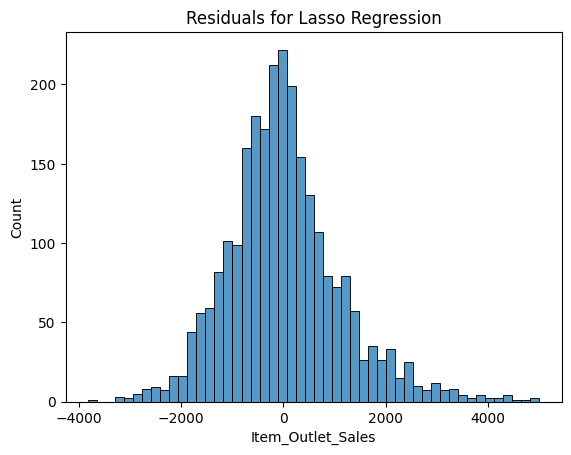

Model: Random Forest
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Cross-Validation Scores: [1237520.01045426 1201525.69818652 1195912.76337263 1204591.44262288
 1206942.49748972]
Mean CV Score: 1209298.482425203
Standard Deviation of CV Score: 14585.987675761971
Training R2 Score: 0.7155919516436575
Testing R2 Score: 0.5934762308160412
Training Mean Squared Error: 838801.2673679944
Testing Mean Squared Error: 1147620.2312959232


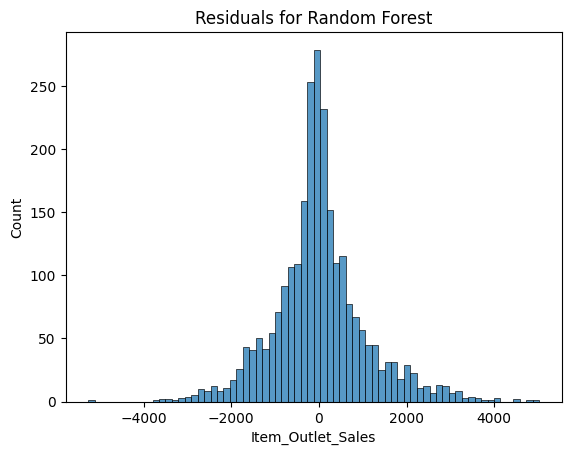

Model: Decision Tree
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Cross-Validation Scores: [1434425.01702146 1390898.66137456 1407264.8516616  1359612.33872987
 1343967.30327722]
Mean CV Score: 1387233.6344129432
Standard Deviation of CV Score: 32485.75092176152
Training R2 Score: 0.6726351090001039
Testing R2 Score: 0.547770982811064
Training Mean Squared Error: 965493.3714057623
Testing Mean Squared Error: 1276646.554632933


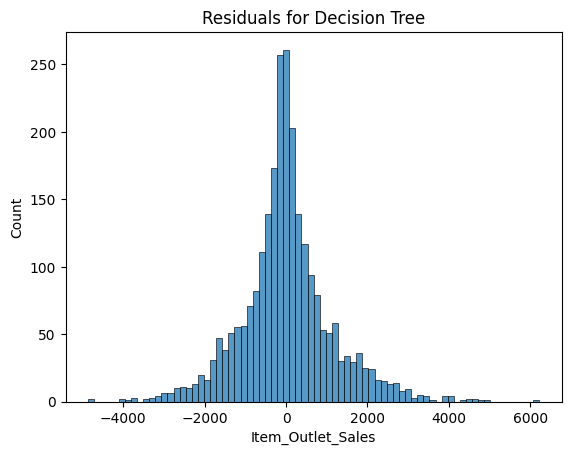

Model: Support Vector Regressor
Best Parameters: {'classifier__C': 10.0, 'classifier__kernel': 'linear'}
Cross-Validation Scores: [1423843.03879204 1304668.44381193 1270499.09117819 1342418.67232028
 1377425.8890457 ]
Mean CV Score: 1343771.0270296293
Standard Deviation of CV Score: 53747.175304333374
Training R2 Score: 0.5398273516251273
Testing R2 Score: 0.5436517780097194
Training Mean Squared Error: 1357181.7073942586
Testing Mean Squared Error: 1288275.106578035


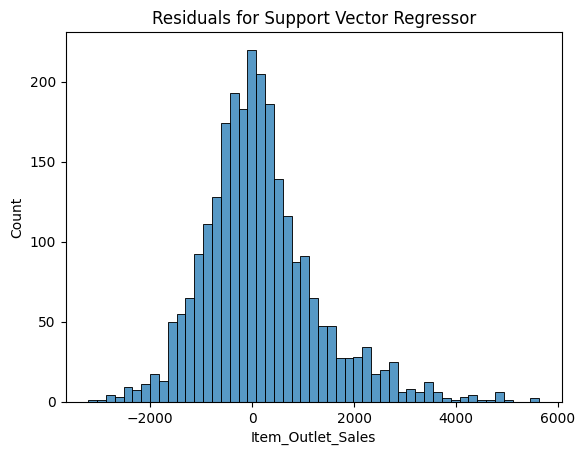

model_name  \
0         Linear Regression   
1          Ridge Regression   
2          Lasso Regression   
3             Random Forest   
4             Decision Tree   
5  Support Vector Regressor   

                                         best_params  cv_scores_mean  \
0                                                 {}    1.283706e+06   
1                         {'classifier__alpha': 1.0}    1.283709e+06   
2                        {'classifier__alpha': 10.0}    1.280698e+06   
3  {'classifier__max_depth': 10, 'classifier__min...    1.209298e+06   
4  {'classifier__max_depth': 10, 'classifier__min...    1.387234e+06   
5  {'classifier__C': 10.0, 'classifier__kernel': ...    1.343771e+06   

   cv_scores_std  training_r2  testing_r2  training_mse   testing_mse  
0   32310.665370     0.563342    0.562711  1.287831e+06  1.234471e+06  
1   32318.307828     0.563324    0.562697  1.287884e+06  1.234510e+06  
2   34028.860730     0.560875    0.563070  1.295105e+06  1.233458e+06  
3   14585.987676     0.715592    0.593476  8.388013e+05  1.147620e+06  
4   32485.750922     0.672635    0.547771  9.654934e+05  1.276647e+06  
5   53747.175304     0.539827    0.543652  1.357182e+06  1.288275e+06

In [ ]:
results = []
for model_name, model in models.items():
    result = evaluate_model(model_name, model, param_grids[model_name])
    results.append(result)

# Store the results in a DataFrame
results_df = pd.DataFrame(results)
display(results_df)

In [ ]:
sorted_results = results_df.sort_values(by='testing_r2', ascending=False)

# Get the best model
best_model = sorted_results.iloc[0]

print("Best Model:")
print(best_model)

Best Model:
model_name                                            Random Forest
best_params       {'classifier__max_depth': 10, 'classifier__min...
cv_scores_mean                                       1209298.482425
cv_scores_std                                          14585.987676
training_r2                                                0.715592
testing_r2                                                 0.593476
training_mse                                          838801.267368
testing_mse                                          1147620.231296
Name: 3, dtype: object


Best Model: Random Forest
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}


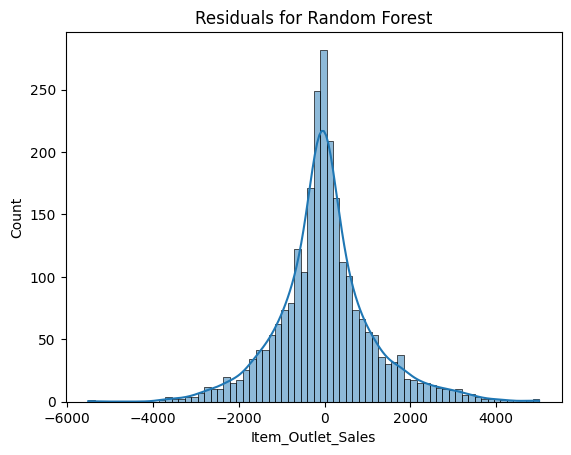

In [ ]:
best_model = sorted_results.iloc[0]

# Get the best model name and parameters
best_model_name = best_model['model_name']
best_model_params = best_model['best_params']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_params}")


# Get the best model object
best_model_object = models[best_model_name]

# Create the pipeline for the best model with the best parameters
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model_object)
])

# Fit the pipeline on the training data
best_pipeline.fit(x_train, y_train)

# Make predictions
y_pred_train = best_pipeline.predict(x_train)
y_pred_test = best_pipeline.predict(x_test)

# Plot the residuals
sns.histplot(y_test - y_pred_test, kde=True)
plt.title(f"Residuals for {best_model_name}")
plt.show()